In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt
import mpl_scatter_density
from sklearn.mixture import GaussianMixture

# Comparing catalogue (vG+2023)

In [2]:
df_vg =  pd.read_csv('Catalogues/NGC2539_vG2023.csv')
df_vg

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
0,5727475713997164544,122.085796,-12.939379,0.9430,-2.372,-0.566,17.386324,18.035172,16.613567,NGC_2539,0.84
1,5727515811804670592,122.638484,-12.566409,1.2234,-2.221,-0.051,19.603275,20.804945,18.510267,NGC_2539,0.09
2,5727507462388545664,122.523434,-12.672588,0.8526,-2.399,-0.955,19.217720,20.322325,18.229084,NGC_2539,0.21
3,5727507496752995840,122.536228,-12.662708,0.8160,-2.199,-0.547,16.872574,17.405119,16.186954,NGC_2539,1.00
4,5727507561172761856,122.509307,-12.670922,0.5242,-2.144,-0.415,18.661766,19.653498,17.700052,NGC_2539,0.34
...,...,...,...,...,...,...,...,...,...,...,...
1134,5727686029950761984,122.436633,-12.071114,0.8368,-2.601,-0.613,14.364020,14.657393,13.891092,NGC_2539,0.74
1135,5727682387818471424,122.556861,-12.103188,0.8857,-2.488,-0.567,17.228657,17.876680,16.451502,NGC_2539,0.85
1136,5726626199526265600,122.875036,-13.668124,0.7324,-2.075,-0.386,17.558283,18.167610,16.768515,NGC_2539,0.74
1137,5727679742118907008,122.865618,-11.972691,0.6424,-2.494,-0.172,16.122349,16.502184,15.576842,NGC_2539,0.05


In [3]:
jj, = np.where(df_vg.Pmemb >= 0.7)
dfvg = df_vg.iloc[jj]

In [4]:
dfvg

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
0,5727475713997164544,122.085796,-12.939379,0.9430,-2.372,-0.566,17.386324,18.035172,16.613567,NGC_2539,0.84
3,5727507496752995840,122.536228,-12.662708,0.8160,-2.199,-0.547,16.872574,17.405119,16.186954,NGC_2539,1.00
5,5727507634191970944,122.500003,-12.664322,0.7972,-2.162,-0.627,16.262781,16.715390,15.630763,NGC_2539,1.00
8,5727508012149665920,122.618510,-12.677455,0.7509,-2.210,-0.656,13.517174,13.713009,13.184590,NGC_2539,1.00
9,5727508080869467136,122.588714,-12.679646,0.7523,-2.359,-0.490,14.676732,14.967432,14.226639,NGC_2539,1.00
...,...,...,...,...,...,...,...,...,...,...,...
1125,5726619018337860608,123.252087,-13.586994,0.6999,-2.338,-0.238,12.331991,12.442050,12.137307,NGC_2539,0.94
1134,5727686029950761984,122.436633,-12.071114,0.8368,-2.601,-0.613,14.364020,14.657393,13.891092,NGC_2539,0.74
1135,5727682387818471424,122.556861,-12.103188,0.8857,-2.488,-0.567,17.228657,17.876680,16.451502,NGC_2539,0.85
1136,5726626199526265600,122.875036,-13.668124,0.7324,-2.075,-0.386,17.558283,18.167610,16.768515,NGC_2539,0.74


# 5 Populations

In [5]:
p1_5p = pd.read_csv('Catalogues/pop1_NGC2539_GMM1_5populations.csv')
p2_5p = pd.read_csv('Catalogues/pop2_NGC2539_GMM1_5populations.csv')
p3_5p = pd.read_csv('Catalogues/pop3_NGC2539_GMM1_5populations.csv')
p4_5p = pd.read_csv('Catalogues/pop4_NGC2539_GMM1_5populations.csv')
p5_5p = pd.read_csv('Catalogues/pop5_NGC2539_GMM1_5populations.csv')

## Computing Completeness and Purity

### Population 1

In [6]:
ra1 = p1_5p.RA_ICRS
dec1 = p1_5p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [7]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [8]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [9]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [10]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [11]:
p1_5p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
0,122.480864,-13.408580,5725195086362592896,0.0091,0.0076,0.7372,0.0136,2.353,-2.286,0.013,...,13.472965,13.666136,13.149684,0.516452,NaN,-32.626777,122.480874,-13.408578,0.779411,0
1,122.414196,-13.314850,5725199621848057984,0.0086,0.0071,0.7725,0.0128,2.388,-2.311,0.012,...,13.363639,13.594479,12.984633,0.609845,38.47,-32.552534,122.414207,-13.314847,0.814383,0
2,122.250761,-13.170479,5725956017127403648,0.0172,0.0129,0.7394,0.0263,2.385,-2.347,0.027,...,14.926690,15.240170,14.442820,0.797351,NaN,-32.452962,122.250772,-13.170477,0.781669,0
3,122.103406,-13.064577,5725970276418851328,0.0126,0.0091,0.7605,0.0178,2.361,-2.301,0.019,...,13.934523,14.170032,13.552169,0.617864,24.37,-32.386462,122.103416,-13.064574,0.802698,0
4,122.775145,-13.479979,5726679491477381504,0.0099,0.0081,0.6943,0.0144,2.384,-2.350,0.014,...,13.190701,13.337885,12.910949,0.426936,NaN,-32.622936,122.775155,-13.479977,0.736667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,122.774600,-12.305781,5727617271816364032,0.0158,0.0142,0.7523,0.0232,2.489,-2.374,0.024,...,14.581053,14.875655,14.124689,0.750966,33.53,-31.487406,122.774611,-12.305778,0.794660,0
528,122.749541,-12.298492,5727617550992630528,0.0408,0.0394,0.7921,0.0634,2.349,-2.276,0.065,...,16.656437,17.172783,15.991074,1.181709,NaN,-31.486533,122.749552,-12.298490,0.823610,0
529,122.746981,-12.238204,5727664933071818624,0.0326,0.0303,0.7213,0.0490,2.408,-2.327,0.047,...,16.202570,16.640747,15.597906,1.042841,NaN,-31.428826,122.746991,-12.238201,0.754288,0
530,122.678529,-12.205109,5727665959566833280,0.0263,0.0248,0.7160,0.0404,2.447,-2.376,0.039,...,15.679736,16.076110,15.110518,0.965592,NaN,-31.413650,122.678540,-12.205106,0.758490,0


In [12]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
1021,5725195086362592896,122.480864,-13.408580,0.7372,-2.286,-0.556,13.472965,13.666136,13.149684,NGC_2539,1.0
1037,5725199621848057984,122.414196,-13.314850,0.7725,-2.311,-0.600,13.363639,13.594479,12.984633,NGC_2539,1.0
984,5725956017127403648,122.250761,-13.170479,0.7394,-2.347,-0.421,14.926690,15.240170,14.442820,NGC_2539,1.0
995,5725970276418851328,122.103406,-13.064577,0.7605,-2.301,-0.531,13.934523,14.170032,13.552169,NGC_2539,1.0
1102,5726679491477381504,122.775145,-13.479979,0.6943,-2.350,-0.400,13.190701,13.337885,12.910949,NGC_2539,1.0
...,...,...,...,...,...,...,...,...,...,...,...
435,5727617271816364032,122.774600,-12.305781,0.7523,-2.374,-0.748,14.581053,14.875655,14.124689,NGC_2539,1.0
436,5727617550992630528,122.749541,-12.298492,0.7921,-2.276,-0.582,16.656437,17.172783,15.991074,NGC_2539,1.0
1112,5727664933071818624,122.746981,-12.238204,0.7213,-2.327,-0.620,16.202570,16.640747,15.597906,NGC_2539,1.0
1109,5727665959566833280,122.678529,-12.205109,0.7160,-2.376,-0.585,15.679736,16.076110,15.110518,NGC_2539,1.0


(121.2, 124.5)

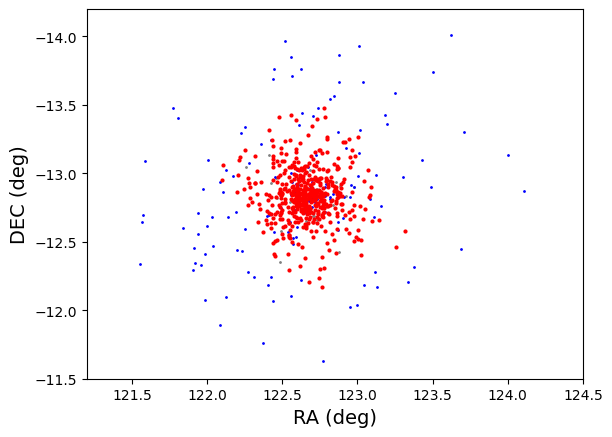

In [13]:
fig, ax = plt.subplots()

ax.scatter(p1_5p.RA_ICRS, p1_5p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p1_5p.iloc[matched_idx_catalog1].RA_ICRS, p1_5p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [14]:
dfvg_t = len(dfvg)
p1_5p_t = len(p1_5p.iloc[matched_idx_catalog1])

Completeness


In [15]:
p1_5p_c = p1_5p_t /dfvg_t
p1_5p_c*100

76.94656488549619

Pureness

In [16]:
p1_5p_p = p1_5p_t/len(p1_5p)
p1_5p_p*100

94.73684210526315

### Population 2

In [17]:
ra1 = p2_5p.RA_ICRS
dec1 = p2_5p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [18]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [19]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [20]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [21]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [22]:
p2_5p

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
0,120.750245,-12.176855,3036167945540297216,0.0871,0.0647,0.8691,0.1415,3.414,-3.204,0.141,...,18.310925,19.155960,17.442314,1.713646,NaN,-31.849131,120.750260,-12.176860,0.893827,1
1,120.830799,-12.110140,3036174508246849152,0.3851,0.2784,0.8398,0.7343,4.241,-4.052,0.606,...,20.334070,21.634747,19.380322,2.254425,NaN,-31.765490,120.830818,-12.110146,0.819051,1
2,120.865892,-12.053844,3036176260594179968,0.3226,0.2353,0.8302,0.5866,1.703,-1.330,0.447,...,20.021528,20.645718,19.416590,1.229128,NaN,-31.702607,120.865898,-12.053849,0.845315,1
3,120.845173,-11.953788,3036178184739509760,0.2996,0.2205,0.8932,0.5969,4.116,-3.944,0.447,...,20.000840,20.934265,19.032677,1.901588,NaN,-31.610324,120.845191,-11.953793,0.887624,1
4,120.828626,-11.957259,3036181105319332480,0.0110,0.0089,0.7827,0.0174,2.407,-2.268,0.018,...,12.007233,12.213915,11.656758,0.557157,-17.66,-31.617571,120.828636,-11.957263,0.822212,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,122.863298,-10.951620,5728376415876143744,0.3125,0.2588,0.7072,0.5616,2.475,-2.171,0.488,...,19.925348,20.750414,19.257856,1.492557,NaN,-30.154804,122.863307,-10.951625,0.714215,1
2990,122.849751,-10.905443,5728376798130677248,0.1032,0.0903,0.7158,0.1589,4.085,-3.899,0.173,...,18.253717,18.794785,17.585531,1.209253,NaN,-30.113407,122.849768,-10.905448,0.740703,1
2991,122.538909,-10.915045,5728385456786179584,0.1651,0.1537,0.7426,0.2426,1.298,-0.960,0.252,...,19.035507,19.406060,18.552877,0.853182,NaN,-30.198554,122.538913,-10.915049,0.757974,1
2992,122.475384,-10.871202,5728386723798209280,0.1011,0.0877,0.8343,0.1611,3.716,-3.442,0.172,...,18.275723,19.125555,17.387320,1.738236,NaN,-30.171499,122.475400,-10.871209,0.859060,1


In [23]:
p2_5p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster


In [24]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb


(121.2, 124.5)

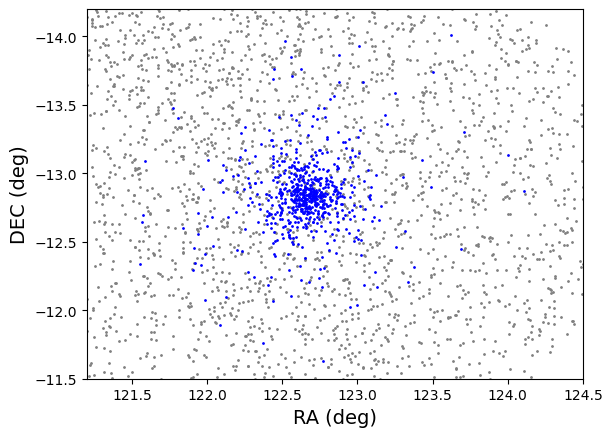

In [25]:
fig, ax = plt.subplots()

ax.scatter(p2_5p.RA_ICRS, p2_5p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p2_5p.iloc[matched_idx_catalog1].RA_ICRS, p2_5p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [26]:
dfvg_t = len(dfvg)
p2_5p_t = len(p2_5p.iloc[matched_idx_catalog1])

Completeness


In [27]:
p2_5p_c = p2_5p_t /dfvg_t
p2_5p_c*100

0.0

Pureness

In [28]:
p2_5p_p = p2_5p_t/len(p2_5p)
p2_5p_p*100

0.0

### Population 3

In [29]:
ra1 = p3_5p.RA_ICRS
dec1 = p3_5p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [30]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [31]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [32]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [33]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [34]:
p3_5p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
1631,122.921398,-13.185993,5726694747202461312,0.0559,0.0568,0.6139,0.078,2.329,-2.26,0.084,...,17.271206,17.964739,16.48068,1.484058,NaN,-32.302333,122.921408,-13.18599,0.64328,2


In [35]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
321,5726694747202461312,122.921398,-13.185993,0.6139,-2.26,-0.563,17.271206,17.964739,16.48068,NGC_2539,0.78


(121.2, 124.5)

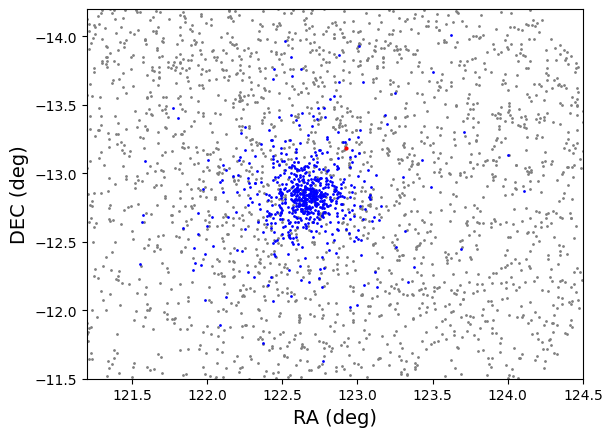

In [36]:
fig, ax = plt.subplots()

ax.scatter(p3_5p.RA_ICRS, p3_5p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p3_5p.iloc[matched_idx_catalog1].RA_ICRS, p3_5p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [37]:
dfvg_t = len(dfvg)
p3_5p_t = len(p3_5p.iloc[matched_idx_catalog1])

Completeness


In [38]:
p3_5p_c = p3_5p_t /dfvg_t
p3_5p_c*100

0.15267175572519084

Pureness

In [39]:
p3_5p_p = p3_5p_t/len(p3_5p)
p3_5p_p*100

0.03354579000335458

### Population 4

In [40]:
ra1 = p4_5p.RA_ICRS
dec1 = p4_5p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [41]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [42]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [43]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [44]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [45]:
p4_5p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
463,123.007680,-13.927760,5724918868422661120,0.0225,0.0210,0.8103,0.0328,2.498,-2.426,0.033,...,15.580099,15.963792,15.036696,0.927096,NaN,-32.997611,123.007691,-13.927758,0.852579,3
743,122.876573,-13.863225,5725107915705369984,0.0249,0.0203,0.8040,0.0383,2.409,-2.290,0.041,...,15.763227,16.162367,15.196784,0.965583,NaN,-32.968078,122.876584,-13.863222,0.846286,3
758,122.516375,-13.965907,5725113481983114240,0.0463,0.0348,0.7145,0.0745,2.281,-2.239,0.069,...,17.050293,17.589607,16.384487,1.205120,NaN,-33.156968,122.516385,-13.965905,0.744836,3
771,122.556156,-13.847291,5725116849237274752,0.0244,0.0198,0.7071,0.0384,2.272,-2.152,0.035,...,15.925107,16.289055,15.386557,0.902498,NaN,-33.032424,122.556166,-13.847287,0.748479,3
793,122.623225,-13.760115,5725126401244507904,0.0488,0.0377,0.7557,0.0697,2.415,-2.357,0.069,...,17.152250,17.761162,16.422697,1.338465,NaN,-32.931504,122.623236,-13.760112,0.785536,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3806,121.986992,-12.075530,5727777839175515520,0.0126,0.0085,0.7857,0.0186,2.512,-2.378,0.019,...,14.231053,14.491918,13.813985,0.677933,32.14,-31.456736,121.987003,-12.075527,0.828046,3
3810,122.125904,-12.096970,5727779797680542464,0.0141,0.0096,0.7248,0.0215,2.197,-2.163,0.022,...,14.497416,14.759340,14.081089,0.678251,34.35,-31.443894,122.125913,-12.096969,0.767314,3
3841,122.084503,-11.893047,5727798523739919360,0.0471,0.0336,0.7568,0.0697,2.383,-2.357,0.069,...,17.198061,17.843935,16.455805,1.388130,NaN,-31.256342,122.084513,-11.893045,0.785921,3
4015,122.369838,-11.763095,5727883426649794560,0.0098,0.0077,0.7174,0.0149,2.419,-2.345,0.015,...,13.256223,13.424639,12.966224,0.458415,NaN,-31.061217,122.369849,-11.763092,0.759958,3


In [46]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
1029,5724918868422661120,123.007680,-13.927760,0.8103,-2.426,-0.595,15.580099,15.963792,15.036696,NGC_2539,1.00
1022,5725107915705369984,122.876573,-13.863225,0.8040,-2.290,-0.747,15.763227,16.162367,15.196784,NGC_2539,0.98
971,5725113481983114240,122.516375,-13.965907,0.7145,-2.239,-0.433,17.050293,17.589607,16.384487,NGC_2539,0.74
967,5725116849237274752,122.556156,-13.847291,0.7071,-2.152,-0.728,15.925107,16.289055,15.386557,NGC_2539,0.83
961,5725126401244507904,122.623225,-13.760115,0.7557,-2.357,-0.526,17.152250,17.761162,16.422697,NGC_2539,0.96
...,...,...,...,...,...,...,...,...,...,...,...
264,5727777839175515520,121.986992,-12.075530,0.7857,-2.378,-0.808,14.231053,14.491918,13.813985,NGC_2539,1.00
290,5727779797680542464,122.125904,-12.096970,0.7248,-2.163,-0.385,14.497416,14.759340,14.081089,NGC_2539,1.00
704,5727798523739919360,122.084503,-11.893047,0.7568,-2.357,-0.348,17.198061,17.843935,16.455805,NGC_2539,0.87
399,5727883426649794560,122.369838,-11.763095,0.7174,-2.345,-0.596,13.256223,13.424639,12.966224,NGC_2539,1.00


(121.2, 124.5)

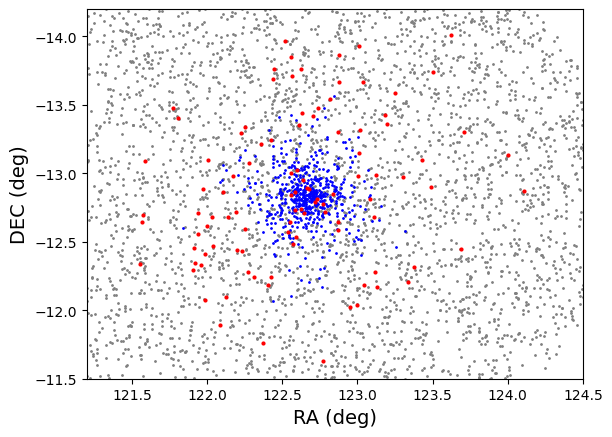

In [47]:
fig, ax = plt.subplots()

ax.scatter(p4_5p.RA_ICRS, p4_5p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p4_5p.iloc[matched_idx_catalog1].RA_ICRS, p4_5p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [48]:
dfvg_t = len(dfvg)
p4_5p_t = len(p4_5p.iloc[matched_idx_catalog1])

Completeness


In [49]:
p4_5p_c = p4_5p_t /dfvg_t
p4_5p_c*100

15.419847328244273

Pureness

In [50]:
p4_5p_p = p4_5p_t/len(p4_5p)
p4_5p_p*100

2.2081329252295583

### Population 5

In [51]:
ra1 = p5_5p.RA_ICRS
dec1 = p5_5p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [52]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [53]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [54]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [55]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [56]:
p5_5p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster


In [57]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb


(121.2, 124.5)

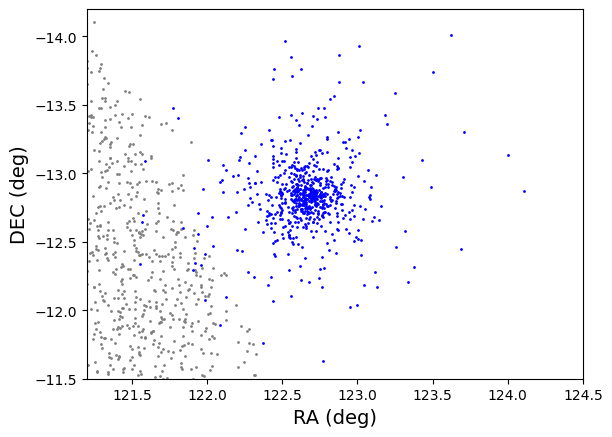

In [58]:
fig, ax = plt.subplots()

ax.scatter(p5_5p.RA_ICRS, p5_5p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p5_5p.iloc[matched_idx_catalog1].RA_ICRS, p5_5p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [59]:
dfvg_t = len(dfvg)
p5_5p_t = len(p5_5p.iloc[matched_idx_catalog1])

Completeness


In [60]:
p5_5p_c = p5_5p_t /dfvg_t
p5_5p_c*100

0.0

Pureness

In [61]:
p5_5p_p = p5_5p_t/len(p5_5p)
p5_5p_p*100

0.0

## Analyzing

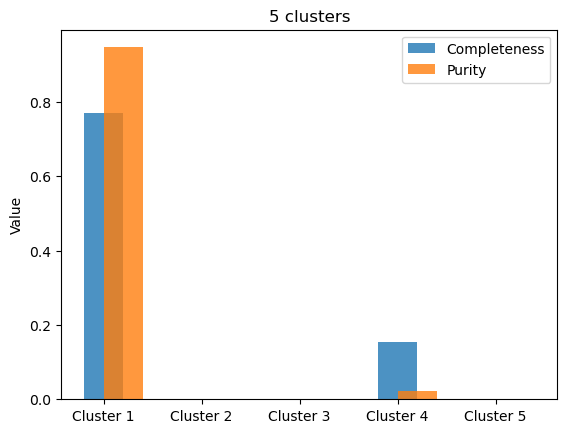

In [63]:

import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2, 3, 4, 5]
completeness = [p1_5p_c, p2_5p_c, p3_5p_c, p4_5p_c, p5_5p_c]  # Exemplo de completude
purity = [p1_5p_p, p2_5p_p, p3_5p_p, p4_5p_p, p5_5p_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("5 clusters")
plt.legend()
plt.show()

# 4 Populations

In [64]:
p1_4p = pd.read_csv('Catalogues/pop1_NGC2539_GMM1_4populations.csv')
p2_4p = pd.read_csv('Catalogues/pop2_NGC2539_GMM1_4populations.csv')
p3_4p = pd.read_csv('Catalogues/pop3_NGC2539_GMM1_4populations.csv')
p4_4p = pd.read_csv('Catalogues/pop4_NGC2539_GMM1_4populations.csv')

## Computing Completeness and Purity

### Population 1

In [65]:
ra1 = p1_4p.RA_ICRS
dec1 = p1_4p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [66]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [67]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [68]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [69]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [70]:
p1_4p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
0,122.480864,-13.408580,5725195086362592896,0.0091,0.0076,0.7372,0.0136,2.353,-2.286,0.013,...,13.472965,13.666136,13.149684,0.516452,NaN,-32.626777,122.480874,-13.408578,0.779411,0
1,122.414196,-13.314850,5725199621848057984,0.0086,0.0071,0.7725,0.0128,2.388,-2.311,0.012,...,13.363639,13.594479,12.984633,0.609845,38.47,-32.552534,122.414207,-13.314847,0.814383,0
2,122.250761,-13.170479,5725956017127403648,0.0172,0.0129,0.7394,0.0263,2.385,-2.347,0.027,...,14.926690,15.240170,14.442820,0.797351,NaN,-32.452962,122.250772,-13.170477,0.781669,0
3,122.103406,-13.064577,5725970276418851328,0.0126,0.0091,0.7605,0.0178,2.361,-2.301,0.019,...,13.934523,14.170032,13.552169,0.617864,24.37,-32.386462,122.103416,-13.064574,0.802698,0
4,122.775145,-13.479979,5726679491477381504,0.0099,0.0081,0.6943,0.0144,2.384,-2.350,0.014,...,13.190701,13.337885,12.910949,0.426936,NaN,-32.622936,122.775155,-13.479977,0.736667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,122.774600,-12.305781,5727617271816364032,0.0158,0.0142,0.7523,0.0232,2.489,-2.374,0.024,...,14.581053,14.875655,14.124689,0.750966,33.53,-31.487406,122.774611,-12.305778,0.794660,0
529,122.749541,-12.298492,5727617550992630528,0.0408,0.0394,0.7921,0.0634,2.349,-2.276,0.065,...,16.656437,17.172783,15.991074,1.181709,NaN,-31.486533,122.749552,-12.298490,0.823610,0
530,122.746981,-12.238204,5727664933071818624,0.0326,0.0303,0.7213,0.0490,2.408,-2.327,0.047,...,16.202570,16.640747,15.597906,1.042841,NaN,-31.428826,122.746991,-12.238201,0.754288,0
531,122.678529,-12.205109,5727665959566833280,0.0263,0.0248,0.7160,0.0404,2.447,-2.376,0.039,...,15.679736,16.076110,15.110518,0.965592,NaN,-31.413650,122.678540,-12.205106,0.758490,0


In [71]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
1021,5725195086362592896,122.480864,-13.408580,0.7372,-2.286,-0.556,13.472965,13.666136,13.149684,NGC_2539,1.0
1037,5725199621848057984,122.414196,-13.314850,0.7725,-2.311,-0.600,13.363639,13.594479,12.984633,NGC_2539,1.0
984,5725956017127403648,122.250761,-13.170479,0.7394,-2.347,-0.421,14.926690,15.240170,14.442820,NGC_2539,1.0
995,5725970276418851328,122.103406,-13.064577,0.7605,-2.301,-0.531,13.934523,14.170032,13.552169,NGC_2539,1.0
1102,5726679491477381504,122.775145,-13.479979,0.6943,-2.350,-0.400,13.190701,13.337885,12.910949,NGC_2539,1.0
...,...,...,...,...,...,...,...,...,...,...,...
435,5727617271816364032,122.774600,-12.305781,0.7523,-2.374,-0.748,14.581053,14.875655,14.124689,NGC_2539,1.0
436,5727617550992630528,122.749541,-12.298492,0.7921,-2.276,-0.582,16.656437,17.172783,15.991074,NGC_2539,1.0
1112,5727664933071818624,122.746981,-12.238204,0.7213,-2.327,-0.620,16.202570,16.640747,15.597906,NGC_2539,1.0
1109,5727665959566833280,122.678529,-12.205109,0.7160,-2.376,-0.585,15.679736,16.076110,15.110518,NGC_2539,1.0


(121.2, 124.5)

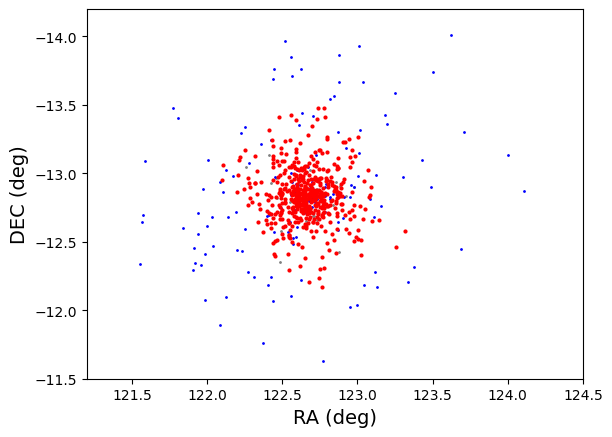

In [72]:
fig, ax = plt.subplots()

ax.scatter(p1_4p.RA_ICRS, p1_4p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p1_4p.iloc[matched_idx_catalog1].RA_ICRS, p1_4p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [73]:
dfvg_t = len(dfvg)
p1_4p_t = len(p1_4p.iloc[matched_idx_catalog1])

Completeness


In [74]:
p1_4p_c = p1_4p_t /dfvg_t
p1_4p_c*100

77.09923664122137

Pureness

In [75]:
p1_4p_p = p1_4p_t/len(p1_4p)
p1_4p_p*100

94.74671669793621

### Population 2

In [76]:
ra1 = p2_4p.RA_ICRS
dec1 = p2_4p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [77]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [78]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [79]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [80]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [81]:
p2_4p

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
0,120.750245,-12.176855,3036167945540297216,0.0871,0.0647,0.8691,0.1415,3.414,-3.204,0.141,...,18.310925,19.155960,17.442314,1.713646,NaN,-31.849131,120.750260,-12.176860,0.893827,1
1,120.830799,-12.110140,3036174508246849152,0.3851,0.2784,0.8398,0.7343,4.241,-4.052,0.606,...,20.334070,21.634747,19.380322,2.254425,NaN,-31.765490,120.830818,-12.110146,0.819051,1
2,120.807018,-12.067062,3036174881909004544,0.3465,0.2689,0.6662,0.5719,2.698,-2.457,0.495,...,20.039885,20.399418,19.497190,0.902227,NaN,-31.729240,120.807029,-12.067067,0.676205,1
3,120.865892,-12.053844,3036176260594179968,0.3226,0.2353,0.8302,0.5866,1.703,-1.330,0.447,...,20.021528,20.645718,19.416590,1.229128,NaN,-31.702607,120.865898,-12.053849,0.845315,1
4,120.846178,-12.058123,3036176432395651584,0.0166,0.0125,0.6137,0.0255,4.105,-3.966,0.026,...,15.058605,15.354387,14.598854,0.755533,NaN,-31.711385,120.846196,-12.058128,0.656281,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,122.863298,-10.951620,5728376415876143744,0.3125,0.2588,0.7072,0.5616,2.475,-2.171,0.488,...,19.925348,20.750414,19.257856,1.492557,NaN,-30.154804,122.863307,-10.951625,0.714215,1
3719,122.849751,-10.905443,5728376798130677248,0.1032,0.0903,0.7158,0.1589,4.085,-3.899,0.173,...,18.253717,18.794785,17.585531,1.209253,NaN,-30.113407,122.849768,-10.905448,0.740703,1
3720,122.538909,-10.915045,5728385456786179584,0.1651,0.1537,0.7426,0.2426,1.298,-0.960,0.252,...,19.035507,19.406060,18.552877,0.853182,NaN,-30.198554,122.538913,-10.915049,0.757974,1
3721,122.475384,-10.871202,5728386723798209280,0.1011,0.0877,0.8343,0.1611,3.716,-3.442,0.172,...,18.275723,19.125555,17.387320,1.738236,NaN,-30.171499,122.475400,-10.871209,0.859060,1


In [82]:
p2_4p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster


In [83]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb


(121.2, 124.5)

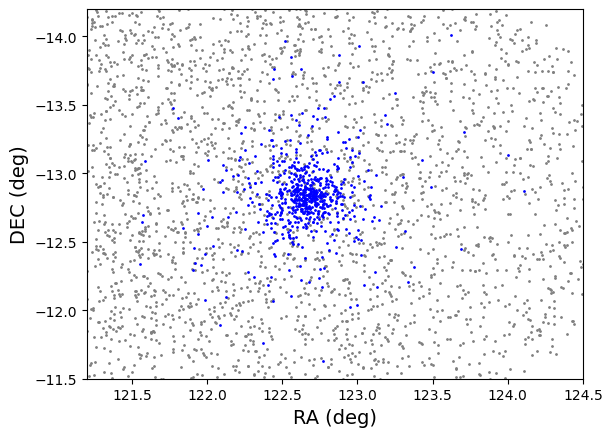

In [84]:
fig, ax = plt.subplots()

ax.scatter(p2_4p.RA_ICRS, p2_4p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p2_4p.iloc[matched_idx_catalog1].RA_ICRS, p2_4p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [85]:
dfvg_t = len(dfvg)
p2_4p_t = len(p2_4p.iloc[matched_idx_catalog1])

Completeness


In [86]:
p2_4p_c = p2_4p_t /dfvg_t
p2_4p_c*100

0.0

Pureness

In [87]:
p2_4p_p = p2_4p_t/len(p2_4p)
p2_4p_p*100

0.0

### Population 3

In [88]:
ra1 = p3_4p.RA_ICRS
dec1 = p3_4p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [89]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [90]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [91]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [92]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [93]:
p3_4p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
1969,122.921398,-13.185993,5726694747202461312,0.0559,0.0568,0.6139,0.078,2.329,-2.26,0.084,...,17.271206,17.964739,16.48068,1.484058,NaN,-32.302333,122.921408,-13.18599,0.64328,2


In [94]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
321,5726694747202461312,122.921398,-13.185993,0.6139,-2.26,-0.563,17.271206,17.964739,16.48068,NGC_2539,0.78


(121.2, 124.5)

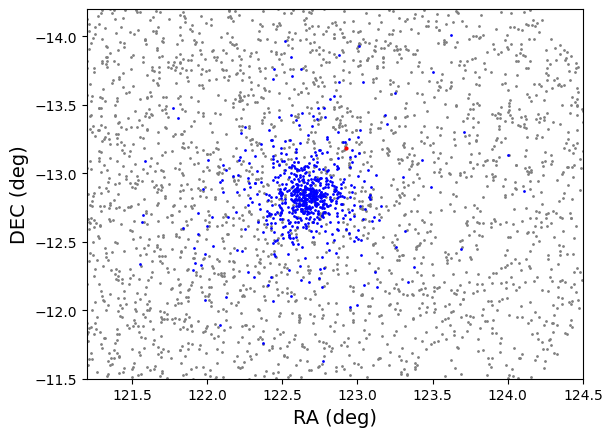

In [95]:
fig, ax = plt.subplots()

ax.scatter(p3_4p.RA_ICRS, p3_4p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p3_4p.iloc[matched_idx_catalog1].RA_ICRS, p3_4p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [96]:
dfvg_t = len(dfvg)
p3_4p_t = len(p3_4p.iloc[matched_idx_catalog1])

Completeness


In [97]:
p3_4p_c = p3_4p_t /dfvg_t
p3_4p_c*100

0.15267175572519084

Pureness

In [98]:
p3_4p_p = p3_4p_t/len(p3_4p)
p3_4p_p*100

0.028312570781426957

### Population 4

In [99]:
ra1 = p4_4p.RA_ICRS
dec1 = p4_4p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [100]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [101]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [102]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [103]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [104]:
p4_4p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
455,123.007680,-13.927760,5724918868422661120,0.0225,0.0210,0.8103,0.0328,2.498,-2.426,0.033,...,15.580099,15.963792,15.036696,0.927096,NaN,-32.997611,123.007691,-13.927758,0.852579,3
716,122.876573,-13.863225,5725107915705369984,0.0249,0.0203,0.8040,0.0383,2.409,-2.290,0.041,...,15.763227,16.162367,15.196784,0.965583,NaN,-32.968078,122.876584,-13.863222,0.846286,3
729,122.516375,-13.965907,5725113481983114240,0.0463,0.0348,0.7145,0.0745,2.281,-2.239,0.069,...,17.050293,17.589607,16.384487,1.205120,NaN,-33.156968,122.516385,-13.965905,0.744836,3
741,122.556156,-13.847291,5725116849237274752,0.0244,0.0198,0.7071,0.0384,2.272,-2.152,0.035,...,15.925107,16.289055,15.386557,0.902498,NaN,-33.032424,122.556166,-13.847287,0.748479,3
764,122.623225,-13.760115,5725126401244507904,0.0488,0.0377,0.7557,0.0697,2.415,-2.357,0.069,...,17.152250,17.761162,16.422697,1.338465,NaN,-32.931504,122.623236,-13.760112,0.785536,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,121.986992,-12.075530,5727777839175515520,0.0126,0.0085,0.7857,0.0186,2.512,-2.378,0.019,...,14.231053,14.491918,13.813985,0.677933,32.14,-31.456736,121.987003,-12.075527,0.828046,3
3684,122.125904,-12.096970,5727779797680542464,0.0141,0.0096,0.7248,0.0215,2.197,-2.163,0.022,...,14.497416,14.759340,14.081089,0.678251,34.35,-31.443894,122.125913,-12.096969,0.767314,3
3719,122.084503,-11.893047,5727798523739919360,0.0471,0.0336,0.7568,0.0697,2.383,-2.357,0.069,...,17.198061,17.843935,16.455805,1.388130,NaN,-31.256342,122.084513,-11.893045,0.785921,3
3911,122.369838,-11.763095,5727883426649794560,0.0098,0.0077,0.7174,0.0149,2.419,-2.345,0.015,...,13.256223,13.424639,12.966224,0.458415,NaN,-31.061217,122.369849,-11.763092,0.759958,3


In [105]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
1029,5724918868422661120,123.007680,-13.927760,0.8103,-2.426,-0.595,15.580099,15.963792,15.036696,NGC_2539,1.00
1022,5725107915705369984,122.876573,-13.863225,0.8040,-2.290,-0.747,15.763227,16.162367,15.196784,NGC_2539,0.98
971,5725113481983114240,122.516375,-13.965907,0.7145,-2.239,-0.433,17.050293,17.589607,16.384487,NGC_2539,0.74
967,5725116849237274752,122.556156,-13.847291,0.7071,-2.152,-0.728,15.925107,16.289055,15.386557,NGC_2539,0.83
961,5725126401244507904,122.623225,-13.760115,0.7557,-2.357,-0.526,17.152250,17.761162,16.422697,NGC_2539,0.96
...,...,...,...,...,...,...,...,...,...,...,...
264,5727777839175515520,121.986992,-12.075530,0.7857,-2.378,-0.808,14.231053,14.491918,13.813985,NGC_2539,1.00
290,5727779797680542464,122.125904,-12.096970,0.7248,-2.163,-0.385,14.497416,14.759340,14.081089,NGC_2539,1.00
704,5727798523739919360,122.084503,-11.893047,0.7568,-2.357,-0.348,17.198061,17.843935,16.455805,NGC_2539,0.87
399,5727883426649794560,122.369838,-11.763095,0.7174,-2.345,-0.596,13.256223,13.424639,12.966224,NGC_2539,1.00


(121.2, 124.5)

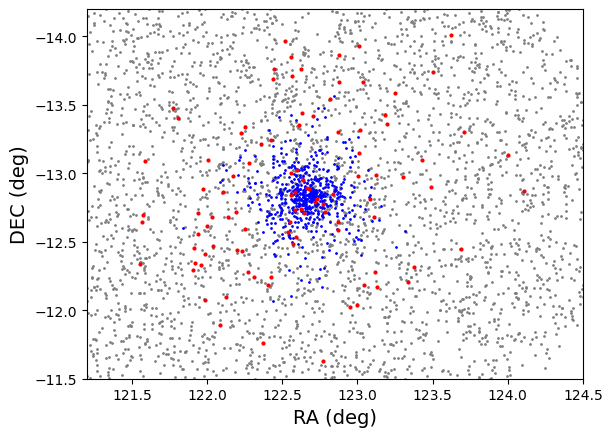

In [106]:
fig, ax = plt.subplots()

ax.scatter(p4_4p.RA_ICRS, p4_4p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p4_4p.iloc[matched_idx_catalog1].RA_ICRS, p4_4p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [107]:
dfvg_t = len(dfvg)
p4_4p_t = len(p4_4p.iloc[matched_idx_catalog1])

Completeness


In [108]:
p4_4p_c = p4_4p_t /dfvg_t
p4_4p_c*100

15.267175572519085

Pureness

In [109]:
p4_4p_p = p4_4p_t/len(p4_4p)
p4_4p_p*100

2.2396416573348263

## Analyzing

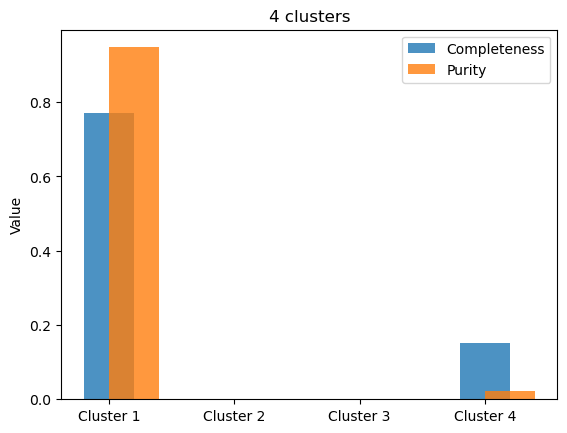

In [111]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2, 3, 4]
completeness = [p1_4p_c, p2_4p_c, p3_4p_c, p4_4p_c]  # Exemplo de completude
purity = [p1_4p_p, p2_4p_p, p3_4p_p, p4_4p_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("4 clusters")
plt.legend()
plt.show()

# 3 Populations

In [112]:
p1_3p = pd.read_csv('Catalogues/pop1_NGC2539_GMM1_3populations.csv')
p2_3p = pd.read_csv('Catalogues/pop2_NGC2539_GMM1_3populations.csv')
p3_3p = pd.read_csv('Catalogues/pop3_NGC2539_GMM1_3populations.csv')

## Computing Completeness and Purity

### Population 1

In [113]:
ra1 = p1_3p.RA_ICRS
dec1 = p1_3p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [114]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [115]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [116]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [117]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [118]:
p1_3p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
511,123.007680,-13.927760,5724918868422661120,0.0225,0.0210,0.8103,0.0328,2.498,-2.426,0.033,...,15.580099,15.963792,15.036696,0.927096,NaN,-32.997611,123.007691,-13.927758,0.852579,0
860,122.876573,-13.863225,5725107915705369984,0.0249,0.0203,0.8040,0.0383,2.409,-2.290,0.041,...,15.763227,16.162367,15.196784,0.965583,NaN,-32.968078,122.876584,-13.863222,0.846286,0
876,122.516375,-13.965907,5725113481983114240,0.0463,0.0348,0.7145,0.0745,2.281,-2.239,0.069,...,17.050293,17.589607,16.384487,1.205120,NaN,-33.156968,122.516385,-13.965905,0.744836,0
893,122.556156,-13.847291,5725116849237274752,0.0244,0.0198,0.7071,0.0384,2.272,-2.152,0.035,...,15.925107,16.289055,15.386557,0.902498,NaN,-33.032424,122.556166,-13.847287,0.748479,0
911,122.623225,-13.760115,5725126401244507904,0.0488,0.0377,0.7557,0.0697,2.415,-2.357,0.069,...,17.152250,17.761162,16.422697,1.338465,NaN,-32.931504,122.623236,-13.760112,0.785536,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,121.986992,-12.075530,5727777839175515520,0.0126,0.0085,0.7857,0.0186,2.512,-2.378,0.019,...,14.231053,14.491918,13.813985,0.677933,32.14,-31.456736,121.987003,-12.075527,0.828046,0
4586,122.125904,-12.096970,5727779797680542464,0.0141,0.0096,0.7248,0.0215,2.197,-2.163,0.022,...,14.497416,14.759340,14.081089,0.678251,34.35,-31.443894,122.125913,-12.096969,0.767314,0
4641,122.084503,-11.893047,5727798523739919360,0.0471,0.0336,0.7568,0.0697,2.383,-2.357,0.069,...,17.198061,17.843935,16.455805,1.388130,NaN,-31.256342,122.084513,-11.893045,0.785921,0
4861,122.369838,-11.763095,5727883426649794560,0.0098,0.0077,0.7174,0.0149,2.419,-2.345,0.015,...,13.256223,13.424639,12.966224,0.458415,NaN,-31.061217,122.369849,-11.763092,0.759958,0


In [119]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
1029,5724918868422661120,123.007680,-13.927760,0.8103,-2.426,-0.595,15.580099,15.963792,15.036696,NGC_2539,1.00
1022,5725107915705369984,122.876573,-13.863225,0.8040,-2.290,-0.747,15.763227,16.162367,15.196784,NGC_2539,0.98
971,5725113481983114240,122.516375,-13.965907,0.7145,-2.239,-0.433,17.050293,17.589607,16.384487,NGC_2539,0.74
967,5725116849237274752,122.556156,-13.847291,0.7071,-2.152,-0.728,15.925107,16.289055,15.386557,NGC_2539,0.83
961,5725126401244507904,122.623225,-13.760115,0.7557,-2.357,-0.526,17.152250,17.761162,16.422697,NGC_2539,0.96
...,...,...,...,...,...,...,...,...,...,...,...
264,5727777839175515520,121.986992,-12.075530,0.7857,-2.378,-0.808,14.231053,14.491918,13.813985,NGC_2539,1.00
290,5727779797680542464,122.125904,-12.096970,0.7248,-2.163,-0.385,14.497416,14.759340,14.081089,NGC_2539,1.00
704,5727798523739919360,122.084503,-11.893047,0.7568,-2.357,-0.348,17.198061,17.843935,16.455805,NGC_2539,0.87
399,5727883426649794560,122.369838,-11.763095,0.7174,-2.345,-0.596,13.256223,13.424639,12.966224,NGC_2539,1.00


(121.2, 124.5)

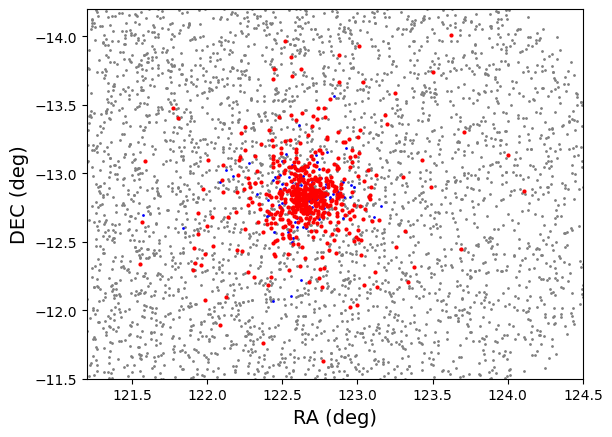

In [120]:
fig, ax = plt.subplots()

ax.scatter(p1_3p.RA_ICRS, p1_3p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p1_3p.iloc[matched_idx_catalog1].RA_ICRS, p1_3p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [121]:
dfvg_t = len(dfvg)
p1_3p_t = len(p1_3p.iloc[matched_idx_catalog1])

Completeness


In [122]:
p1_3p_c = p1_3p_t /dfvg_t
p1_3p_c*100

83.81679389312977

Pureness

In [123]:
p1_3p_p = p1_3p_t/len(p1_3p)
p1_3p_p*100

10.0715465052284

### Population 2

In [124]:
ra1 = p2_3p.RA_ICRS
dec1 = p2_3p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [125]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [126]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [127]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [128]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [129]:
p2_3p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
971,121.572837,-12.695079,5726044733973511808,0.0688,0.0555,0.7872,0.1080,2.349,-2.288,0.103,...,17.874983,18.706310,16.990517,1.715794,NaN,-32.156883,121.572847,-12.695077,0.817435,1
1666,122.425772,-13.241586,5726702409422712192,0.0697,0.0536,0.6523,0.1068,2.509,-2.426,0.105,...,17.896448,18.671953,17.053247,1.618706,NaN,-32.478802,122.425783,-13.241584,0.679101,1
1670,122.522484,-13.143682,5726704715823408000,0.1018,0.0816,0.6877,0.1531,2.489,-2.388,0.162,...,18.476828,19.356115,17.556417,1.799698,NaN,-32.360261,122.522495,-13.143679,0.711632,1
1676,122.798138,-13.156257,5726707391586260608,0.0501,0.0520,0.7241,0.0634,2.461,-2.392,0.063,...,16.949000,17.665560,16.141905,1.523655,NaN,-32.304229,122.798149,-13.156254,0.754431,1
1679,122.729253,-13.086360,5726708770272454400,0.0539,0.0470,0.7007,0.0753,2.486,-2.422,0.077,...,17.279316,18.066133,16.435862,1.630272,NaN,-32.253717,122.729264,-13.086357,0.730215,1
1682,122.566329,-13.063264,5726711175454189184,0.0597,0.0473,0.6964,0.0894,2.458,-2.390,0.088,...,17.360735,18.006016,16.598864,1.407152,NaN,-32.271650,122.566340,-13.063261,0.725545,1
1684,122.743486,-13.030196,5726712412404704512,0.0620,0.0565,0.7135,0.0902,2.505,-2.426,0.090,...,17.559864,18.258055,16.772085,1.485969,NaN,-32.195873,122.743497,-13.030193,0.741915,1
1721,122.901617,-12.933655,5726735227270910976,0.0513,0.0508,0.7898,0.0734,2.477,-2.380,0.073,...,17.018612,17.756893,16.201180,1.555714,NaN,-32.063282,122.901628,-12.933652,0.819968,1
1725,122.755523,-12.968258,5726736322486402432,0.0760,0.0671,0.7751,0.0984,2.458,-2.357,0.105,...,17.607610,18.451881,16.717785,1.734096,NaN,-32.132989,122.755533,-12.968255,0.803475,1
1732,122.873513,-12.866024,5726739041203649408,0.0818,0.0807,0.6778,0.1264,2.397,-2.359,0.124,...,17.850304,18.827652,16.907509,1.920143,NaN,-32.004863,122.873524,-12.866023,0.711401,1


In [130]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
1105,5726044733973511808,121.572837,-12.695079,0.7872,-2.288,-0.530,17.874983,18.706310,16.990517,NGC_2539,0.83
307,5726702409422712192,122.425772,-13.241586,0.6523,-2.426,-0.640,17.896448,18.671953,17.053247,NGC_2539,0.73
301,5726704715823408000,122.522484,-13.143682,0.6877,-2.388,-0.700,18.476828,19.356115,17.556417,NGC_2539,0.77
347,5726707391586260608,122.798138,-13.156257,0.7241,-2.392,-0.577,16.949000,17.665560,16.141905,NGC_2539,0.98
341,5726708770272454400,122.729253,-13.086360,0.7007,-2.422,-0.563,17.279316,18.066133,16.435862,NGC_2539,0.97
330,5726711175454189184,122.566329,-13.063264,0.6964,-2.390,-0.574,17.360735,18.006016,16.598864,NGC_2539,0.92
259,5726712412404704512,122.743486,-13.030196,0.7135,-2.426,-0.623,17.559864,18.258055,16.772085,NGC_2539,0.97
646,5726735227270910976,122.901617,-12.933655,0.7898,-2.380,-0.686,17.018612,17.756893,16.201180,NGC_2539,1.00
594,5726736322486402432,122.755523,-12.968258,0.7751,-2.357,-0.699,17.607610,18.451881,16.717785,NGC_2539,0.97
691,5726739041203649408,122.873513,-12.866024,0.6778,-2.359,-0.423,17.850304,18.827652,16.907509,NGC_2539,0.84


(121.2, 124.5)

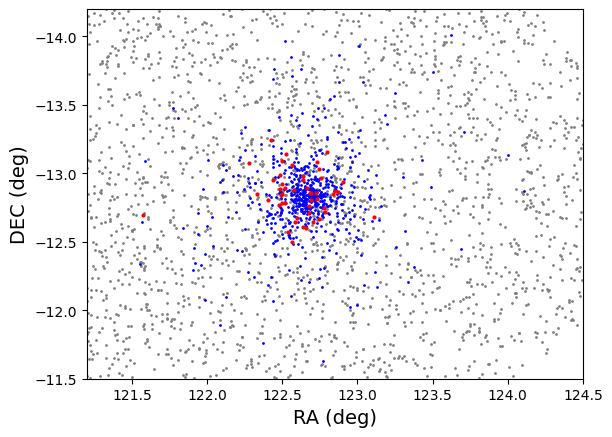

In [131]:
fig, ax = plt.subplots()

ax.scatter(p2_3p.RA_ICRS, p2_3p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p2_3p.iloc[matched_idx_catalog1].RA_ICRS, p2_3p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [132]:
dfvg_t = len(dfvg)
p2_3p_t = len(p2_3p.iloc[matched_idx_catalog1])

Completeness


In [133]:
p2_3p_c = p2_3p_t /dfvg_t
p2_3p_c*100

7.328244274809161

Pureness

In [134]:
p2_3p_p = p2_3p_t/len(p2_3p)
p2_3p_p*100

1.520912547528517

### Population 3

In [135]:
ra1 = p3_3p.RA_ICRS
dec1 = p3_3p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [136]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [137]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [138]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [139]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [140]:
p3_3p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
2030,122.613672,-13.354446,5726685229554458112,0.0579,0.0474,0.6572,0.0886,2.529,-2.496,0.087,...,17.577665,18.265543,16.790585,1.474958,NaN,-32.541604,122.613684,-13.354445,0.685507,2
2048,122.921398,-13.185993,5726694747202461312,0.0559,0.0568,0.6139,0.0780,2.329,-2.260,0.084,...,17.271206,17.964739,16.480680,1.484058,NaN,-32.302333,122.921408,-13.185990,0.643280,2
2075,122.595976,-13.031000,5726711690850248704,0.0512,0.0407,0.6404,0.0811,2.347,-2.301,0.074,...,17.062359,17.641851,16.351288,1.290564,NaN,-32.233123,122.595987,-13.030998,0.670546,2
2517,122.547817,-12.972002,5727463511987435904,0.0968,0.0712,0.6307,0.1485,2.331,-2.296,0.147,...,18.121515,18.958378,17.246717,1.711660,NaN,-32.187922,122.547828,-12.972000,0.656476,2
2520,122.621274,-12.911557,5727465612232588928,0.0736,0.0637,0.6394,0.1189,2.387,-2.359,0.114,...,17.720638,18.434364,16.915213,1.519152,NaN,-32.111331,122.621285,-12.911555,0.667010,2
2525,122.557252,-12.840559,5727469254364865024,0.0329,0.0251,0.6488,0.0458,2.485,-2.475,0.047,...,16.412067,16.879095,15.787485,1.091610,NaN,-32.058422,122.557264,-12.840558,0.681092,2
2532,122.171166,-12.980443,5727472278022037504,0.0426,0.0326,0.6585,0.0701,2.312,-2.259,0.067,...,17.123540,17.705719,16.373884,1.331835,NaN,-32.288476,122.171176,-12.980441,0.688429,2
2565,122.719631,-12.805480,5727491588194718336,0.0588,0.0519,0.6471,0.0780,2.373,-2.327,0.083,...,17.026710,17.570848,16.323402,1.247446,NaN,-31.984422,122.719641,-12.805478,0.677407,2
2567,122.624003,-12.807470,5727492859505082624,0.0467,0.0391,0.6429,0.0652,2.367,-2.307,0.069,...,17.027517,17.609938,16.332210,1.277727,NaN,-32.009957,122.624013,-12.807467,0.673165,2


In [141]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
1087,5726685229554458112,122.613672,-13.354446,0.6572,-2.496,-0.405,17.577665,18.265543,16.790585,NGC_2539,0.72
321,5726694747202461312,122.921398,-13.185993,0.6139,-2.260,-0.563,17.271206,17.964739,16.480680,NGC_2539,0.78
297,5726711690850248704,122.595976,-13.031000,0.6404,-2.301,-0.463,17.062359,17.641851,16.351288,NGC_2539,0.90
481,5727463511987435904,122.547817,-12.972002,0.6307,-2.296,-0.400,18.121515,18.958378,17.246717,NGC_2539,0.71
574,5727465612232588928,122.621274,-12.911557,0.6394,-2.359,-0.363,17.720638,18.434364,16.915213,NGC_2539,0.72
557,5727469254364865024,122.557252,-12.840559,0.6488,-2.475,-0.222,16.412067,16.879095,15.787485,NGC_2539,0.91
875,5727472278022037504,122.171166,-12.980443,0.6585,-2.259,-0.491,17.123540,17.705719,16.373884,NGC_2539,0.95
812,5727491588194718336,122.719631,-12.805480,0.6471,-2.327,-0.465,17.026710,17.570848,16.323402,NGC_2539,0.96
790,5727492859505082624,122.624003,-12.807470,0.6429,-2.307,-0.527,17.027517,17.609938,16.332210,NGC_2539,0.96


(121.2, 124.5)

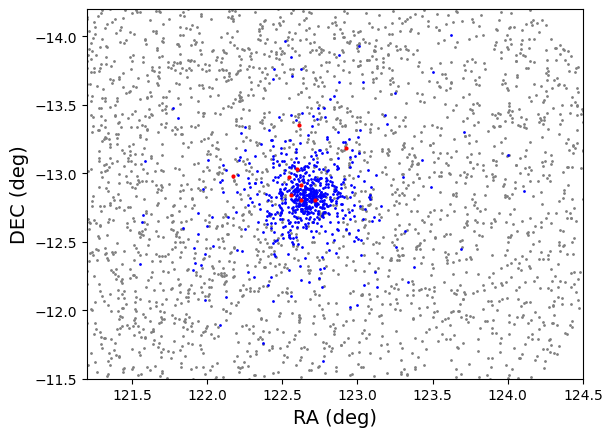

In [142]:
fig, ax = plt.subplots()

ax.scatter(p3_3p.RA_ICRS, p3_3p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p3_3p.iloc[matched_idx_catalog1].RA_ICRS, p3_3p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [143]:
dfvg_t = len(dfvg)
p3_3p_t = len(p3_3p.iloc[matched_idx_catalog1])

Completeness


In [144]:
p3_3p_c = p3_3p_t /dfvg_t
p3_3p_c*100

1.3740458015267176

Pureness

In [145]:
p3_3p_p = p3_3p_t/len(p3_3p)
p3_3p_p*100

0.24684585847504115

## Analyzing

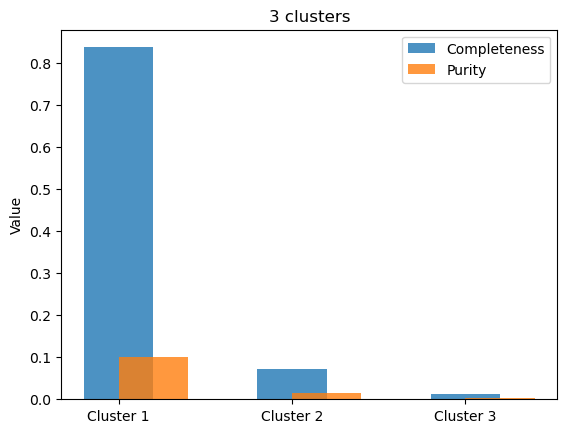

In [147]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2, 3]
completeness = [p1_3p_c, p2_3p_c, p3_3p_c]  # Exemplo de completude
purity = [p1_3p_p, p2_3p_p, p3_3p_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("3 clusters")
plt.legend()
plt.show()

# 2 Populations

In [149]:
p1_2p = pd.read_csv('Catalogues/pop1_NGC2539_GMM1_2populations.csv')
p2_2p = pd.read_csv('Catalogues/pop2_NGC2539_GMM1_2populations.csv')

## Computing Completeness and Purity

### Population 1

In [150]:
ra1 = p1_2p.RA_ICRS
dec1 = p1_2p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [151]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [152]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [153]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [154]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [155]:
p1_2p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
729,123.007680,-13.927760,5724918868422661120,0.0225,0.0210,0.8103,0.0328,2.498,-2.426,0.033,...,15.580099,15.963792,15.036696,0.927096,NaN,-32.997611,123.007691,-13.927758,0.852579,0
1197,122.876573,-13.863225,5725107915705369984,0.0249,0.0203,0.8040,0.0383,2.409,-2.290,0.041,...,15.763227,16.162367,15.196784,0.965583,NaN,-32.968078,122.876584,-13.863222,0.846286,0
1218,122.516375,-13.965907,5725113481983114240,0.0463,0.0348,0.7145,0.0745,2.281,-2.239,0.069,...,17.050293,17.589607,16.384487,1.205120,NaN,-33.156968,122.516385,-13.965905,0.744836,0
1240,122.556156,-13.847291,5725116849237274752,0.0244,0.0198,0.7071,0.0384,2.272,-2.152,0.035,...,15.925107,16.289055,15.386557,0.902498,NaN,-33.032424,122.556166,-13.847287,0.748479,0
1270,122.623225,-13.760115,5725126401244507904,0.0488,0.0377,0.7557,0.0697,2.415,-2.357,0.069,...,17.152250,17.761162,16.422697,1.338465,NaN,-32.931504,122.623236,-13.760112,0.785536,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,121.986992,-12.075530,5727777839175515520,0.0126,0.0085,0.7857,0.0186,2.512,-2.378,0.019,...,14.231053,14.491918,13.813985,0.677933,32.14,-31.456736,121.987003,-12.075527,0.828046,0
6430,122.125904,-12.096970,5727779797680542464,0.0141,0.0096,0.7248,0.0215,2.197,-2.163,0.022,...,14.497416,14.759340,14.081089,0.678251,34.35,-31.443894,122.125913,-12.096969,0.767314,0
6507,122.084503,-11.893047,5727798523739919360,0.0471,0.0336,0.7568,0.0697,2.383,-2.357,0.069,...,17.198061,17.843935,16.455805,1.388130,NaN,-31.256342,122.084513,-11.893045,0.785921,0
6815,122.369838,-11.763095,5727883426649794560,0.0098,0.0077,0.7174,0.0149,2.419,-2.345,0.015,...,13.256223,13.424639,12.966224,0.458415,NaN,-31.061217,122.369849,-11.763092,0.759958,0


In [156]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
1029,5724918868422661120,123.007680,-13.927760,0.8103,-2.426,-0.595,15.580099,15.963792,15.036696,NGC_2539,1.00
1022,5725107915705369984,122.876573,-13.863225,0.8040,-2.290,-0.747,15.763227,16.162367,15.196784,NGC_2539,0.98
971,5725113481983114240,122.516375,-13.965907,0.7145,-2.239,-0.433,17.050293,17.589607,16.384487,NGC_2539,0.74
967,5725116849237274752,122.556156,-13.847291,0.7071,-2.152,-0.728,15.925107,16.289055,15.386557,NGC_2539,0.83
961,5725126401244507904,122.623225,-13.760115,0.7557,-2.357,-0.526,17.152250,17.761162,16.422697,NGC_2539,0.96
...,...,...,...,...,...,...,...,...,...,...,...
264,5727777839175515520,121.986992,-12.075530,0.7857,-2.378,-0.808,14.231053,14.491918,13.813985,NGC_2539,1.00
290,5727779797680542464,122.125904,-12.096970,0.7248,-2.163,-0.385,14.497416,14.759340,14.081089,NGC_2539,1.00
704,5727798523739919360,122.084503,-11.893047,0.7568,-2.357,-0.348,17.198061,17.843935,16.455805,NGC_2539,0.87
399,5727883426649794560,122.369838,-11.763095,0.7174,-2.345,-0.596,13.256223,13.424639,12.966224,NGC_2539,1.00


(121.2, 124.5)

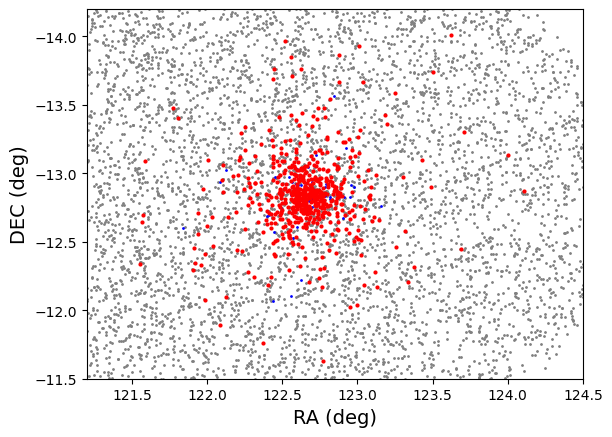

In [157]:
fig, ax = plt.subplots()

ax.scatter(p1_2p.RA_ICRS, p1_2p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p1_2p.iloc[matched_idx_catalog1].RA_ICRS, p1_2p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [158]:
dfvg_t = len(dfvg)
p1_2p_t = len(p1_2p.iloc[matched_idx_catalog1])

Completeness


In [159]:
p1_2p_c = p1_2p_t /dfvg_t
p1_2p_c*100

90.99236641221374

Pureness

In [160]:
p1_2p_p = p1_2p_t/len(p1_2p)
p1_2p_p*100

7.763449264035431

### Population 2

In [161]:
ra1 = p2_2p.RA_ICRS
dec1 = p2_2p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [162]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [163]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [164]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [165]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [166]:
p2_2p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
2574,122.921398,-13.185993,5726694747202461312,0.0559,0.0568,0.6139,0.0780,2.329,-2.260,0.084,...,17.271206,17.964739,16.480680,1.484058,NaN,-32.302333,122.921408,-13.185990,0.643280,1
2589,122.425772,-13.241586,5726702409422712192,0.0697,0.0536,0.6523,0.1068,2.509,-2.426,0.105,...,17.896448,18.671953,17.053247,1.618706,NaN,-32.478802,122.425783,-13.241584,0.679101,1
2608,122.595976,-13.031000,5726711690850248704,0.0512,0.0407,0.6404,0.0811,2.347,-2.301,0.074,...,17.062359,17.641851,16.351288,1.290564,NaN,-32.233123,122.595987,-13.030998,0.670546,1
3142,122.547817,-12.972002,5727463511987435904,0.0968,0.0712,0.6307,0.1485,2.331,-2.296,0.147,...,18.121515,18.958378,17.246717,1.711660,NaN,-32.187922,122.547828,-12.972000,0.656476,1
3145,122.621274,-12.911557,5727465612232588928,0.0736,0.0637,0.6394,0.1189,2.387,-2.359,0.114,...,17.720638,18.434364,16.915213,1.519152,NaN,-32.111331,122.621285,-12.911555,0.667010,1
3152,122.557252,-12.840559,5727469254364865024,0.0329,0.0251,0.6488,0.0458,2.485,-2.475,0.047,...,16.412067,16.879095,15.787485,1.091610,NaN,-32.058422,122.557264,-12.840558,0.681092,1
3154,122.493979,-12.845428,5727469765460098560,0.1364,0.1081,0.6333,0.2040,2.351,-2.272,0.194,...,18.827095,19.748213,17.843770,1.904444,NaN,-32.078703,122.493990,-12.845425,0.655229,1
3205,122.690985,-12.804562,5727490145085719936,0.0655,0.0594,0.6499,0.0940,2.421,-2.346,0.095,...,17.579407,18.285118,16.796236,1.488882,NaN,-31.990612,122.690996,-12.804559,0.678229,1
3209,122.719631,-12.805480,5727491588194718336,0.0588,0.0519,0.6471,0.0780,2.373,-2.327,0.083,...,17.026710,17.570848,16.323402,1.247446,NaN,-31.984422,122.719641,-12.805478,0.677407,1
3213,122.624003,-12.807470,5727492859505082624,0.0467,0.0391,0.6429,0.0652,2.367,-2.307,0.069,...,17.027517,17.609938,16.332210,1.277727,NaN,-32.009957,122.624013,-12.807467,0.673165,1


In [167]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
321,5726694747202461312,122.921398,-13.185993,0.6139,-2.260,-0.563,17.271206,17.964739,16.480680,NGC_2539,0.78
307,5726702409422712192,122.425772,-13.241586,0.6523,-2.426,-0.640,17.896448,18.671953,17.053247,NGC_2539,0.73
297,5726711690850248704,122.595976,-13.031000,0.6404,-2.301,-0.463,17.062359,17.641851,16.351288,NGC_2539,0.90
481,5727463511987435904,122.547817,-12.972002,0.6307,-2.296,-0.400,18.121515,18.958378,17.246717,NGC_2539,0.71
574,5727465612232588928,122.621274,-12.911557,0.6394,-2.359,-0.363,17.720638,18.434364,16.915213,NGC_2539,0.72
557,5727469254364865024,122.557252,-12.840559,0.6488,-2.475,-0.222,16.412067,16.879095,15.787485,NGC_2539,0.91
863,5727469765460098560,122.493979,-12.845428,0.6333,-2.272,-0.604,18.827095,19.748213,17.843770,NGC_2539,0.70
714,5727490145085719936,122.690985,-12.804562,0.6499,-2.346,-0.597,17.579407,18.285118,16.796236,NGC_2539,0.96
812,5727491588194718336,122.719631,-12.805480,0.6471,-2.327,-0.465,17.026710,17.570848,16.323402,NGC_2539,0.96
790,5727492859505082624,122.624003,-12.807470,0.6429,-2.307,-0.527,17.027517,17.609938,16.332210,NGC_2539,0.96


(121.2, 124.5)

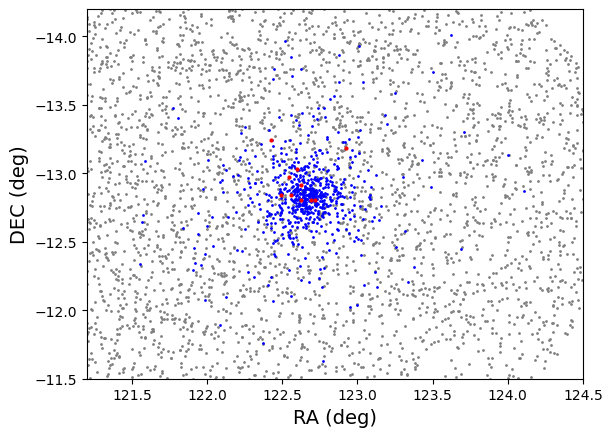

In [168]:
fig, ax = plt.subplots()

ax.scatter(p2_2p.RA_ICRS, p2_2p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p2_2p.iloc[matched_idx_catalog1].RA_ICRS, p2_2p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [169]:
dfvg_t = len(dfvg)
p2_2p_t = len(p2_2p.iloc[matched_idx_catalog1])

Completeness


In [170]:
p2_2p_c = p2_2p_t /dfvg_t
p2_2p_c*100

1.5267175572519083

Pureness

In [171]:
p2_2p_p = p2_2p_t/len(p2_2p)
p2_2p_p*100

0.21853146853146854

## Analyzing

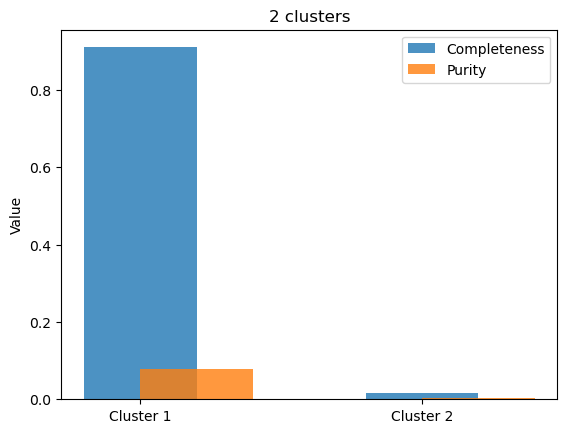

In [173]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2]
completeness = [p1_2p_c, p2_2p_c]  # Exemplo de completude
purity = [p1_2p_p, p2_2p_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("2 clusters")
plt.legend()
plt.show()